# Experiment 1

In [8]:
import pandas as pd
import numpy as np

import quantstats as qs
from tinycta.port import build_portfolio

In [9]:
# Load prices
prices = pd.read_csv("data/Prices_hashed.csv", index_col=0, parse_dates=True).ffill()

In [19]:
# take two moving averages and apply sign-functiond
def f(price, fast=32, slow=96):
    s = price.ewm(com=slow, min_periods=100).mean()
    f = price.ewm(com=fast, min_periods=100).mean()
    return np.sign(f-s) 

In [20]:
from ipywidgets import Label, HBox, VBox, IntSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average")])
right_box = VBox([fast, slow])
HBox([left_box, right_box])

In [68]:
portfolio = build_portfolio(prices=prices, cashposition=
                            1e6*prices.apply(f, fast=fast.value, slow=slow.value))

Results do not look terrible but...
* No concept of risk integrated. 
* The size of each bet is constant regardless of the underlying asset.
* The system lost its mojo in 2009 and has never really recovered.
* The sign function is very expensive to trade as position changes are too extreme.

Such fundamental flaws are not addressed by **parameter-hacking** or **pimp-my-trading-system** steps (remove the worst performing assets, insane quantity of stop-loss limits, ...)


In [72]:
capital = 1e7
a = portfolio.nav(aum=capital)

                    Strategy
------------------  ----------
Start Period        1970-01-02
End Period          2023-04-26
Risk-Free Rate      0.0%
Time in Market      98.0%

Cumulative Return   651.76%
CAGR﹪              2.65%

Sharpe              0.63
Prob. Sharpe Ratio  100.0%
Sortino             0.92
Sortino/√2          0.65
Omega               1.12

Max Drawdown        -21.98%
Longest DD Days     2631

Gain/Pain Ratio     0.12
Gain/Pain (1M)      0.68

Payoff Ratio        1.02
Profit Factor       1.12
Common Sense Ratio  1.17
CPC Index           0.6
Tail Ratio          1.04
Outlier Win Ratio   4.06
Outlier Loss Ratio  3.85

MTD                 0.44%
3M                  1.35%
6M                  -1.51%
YTD                 1.01%
1Y                  -0.6%
3Y (ann.)           1.56%
5Y (ann.)           0.43%
10Y (ann.)          0.97%
All-time (ann.)     2.65%

Avg. Drawdown       -1.54%
Avg. Drawdown Days  68
Recovery Factor     9.64
Ulcer Index         0.07
Serenity Index      1.01


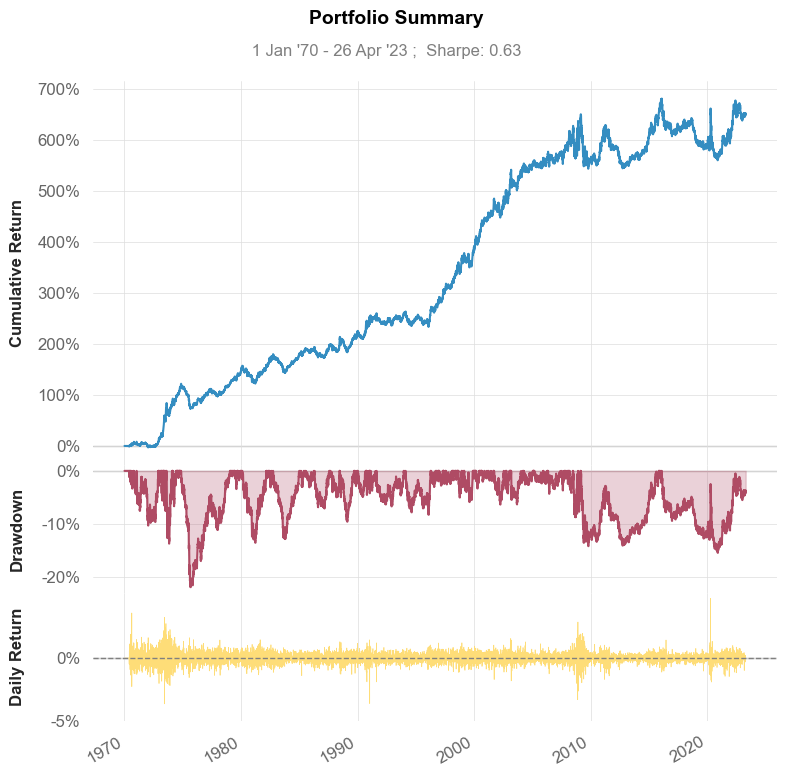

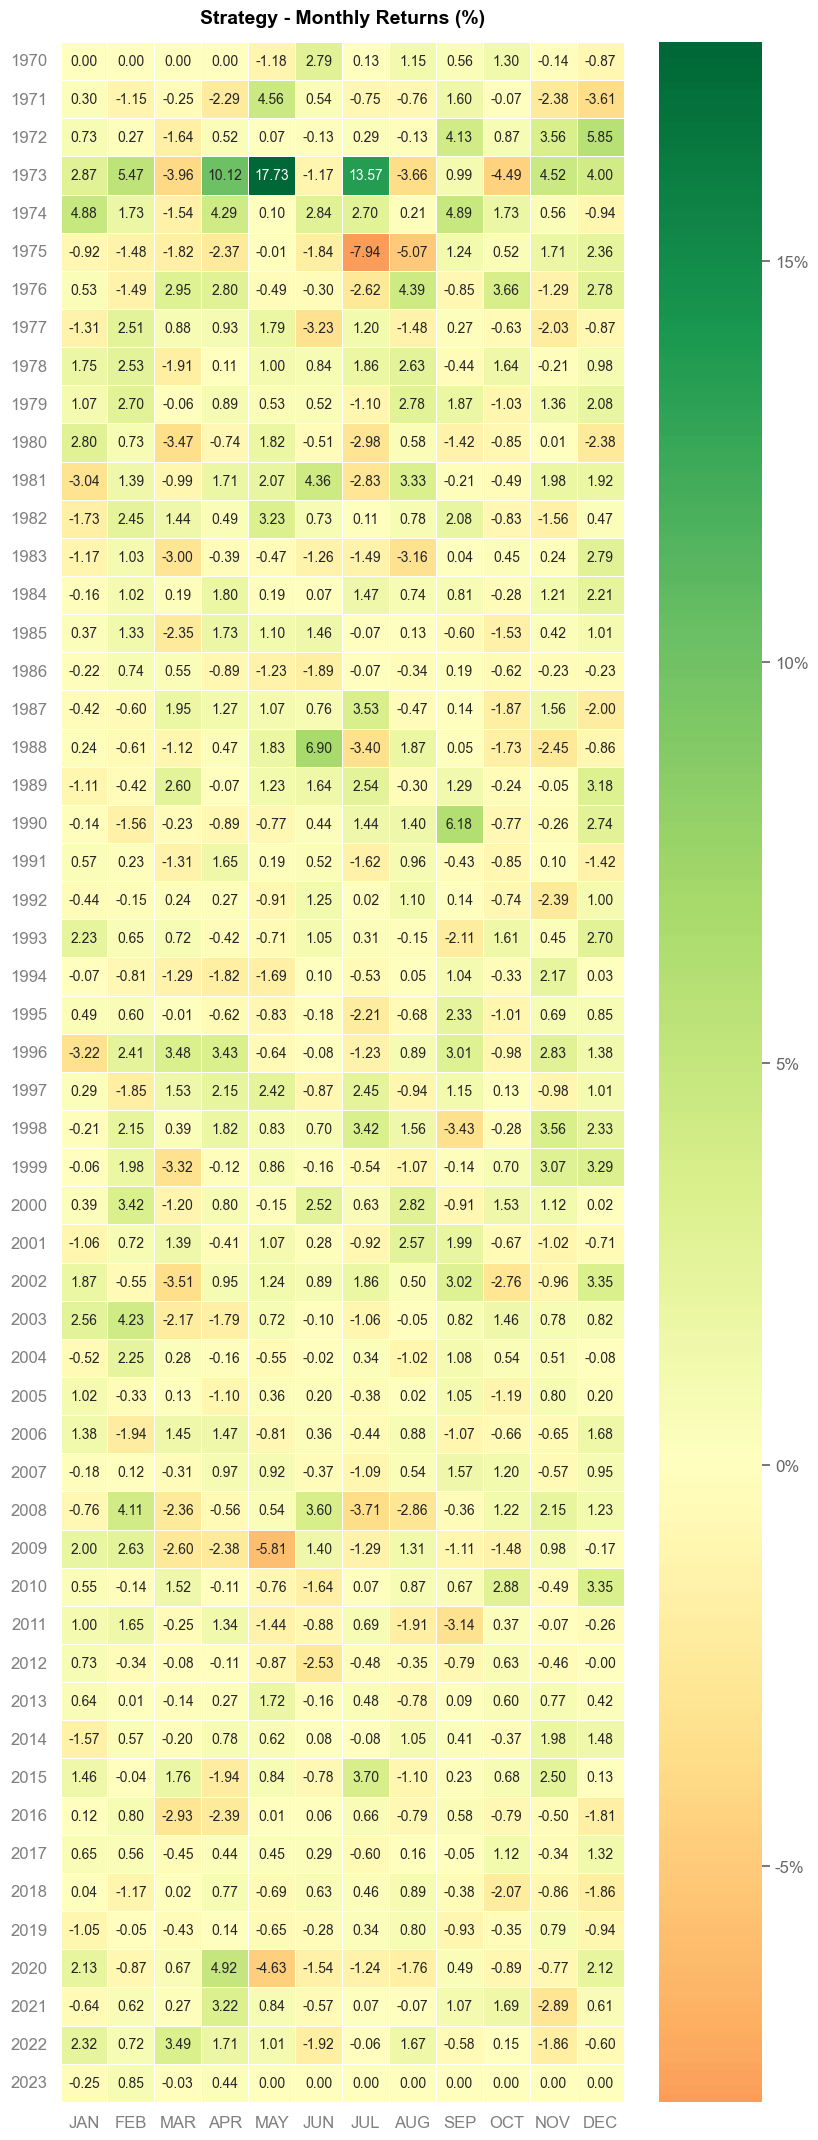

In [73]:
qs.reports.basic(a)